In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 

In [2]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

# Illustrate LHS with Inducing Points

In [3]:
lhs_1 = pd.read_csv('data/lhs_16.csv', index_col=0)
lhs_2 = pd.read_csv('data/lhs_4.csv', index_col=0)

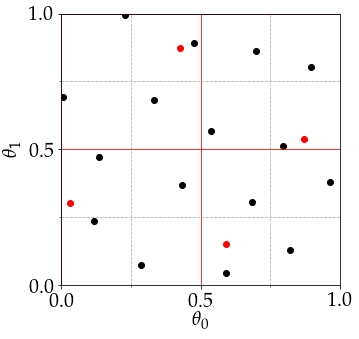

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(lhs_1['V1'], lhs_1['V2'], marker = 'o', c = 'k')
ax.scatter(lhs_2['V1'], lhs_2['V2'], marker = 'o', c = 'r')
ax.set_yticks(np.linspace(0.0, 1.0, 3), minor=False)
ax.set_yticks(np.linspace(0.0, 1.0, 5), minor=True)
ax.set_xticks(np.linspace(0.0, 1.0, 3), minor=False)
ax.set_xticks(np.linspace(0.0, 1.0, 5), minor=True)
ax.yaxis.grid(True, which='major', linestyle = '-', c = 'r')
ax.yaxis.grid(True, which='minor', linestyle = '--')
ax.xaxis.grid(True, which='major', linestyle = '-', c = 'r')
ax.xaxis.grid(True, which='minor', linestyle = '--')
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
plt.ylabel(r'$\theta_{1}$', fontsize = fontSize)
plt.xlabel(r'$\theta_{0}$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

# Testing SVGP

In [ ]:
# inputs =  torch.from_numpy(lhs_1.values)
# inducing = torch.from_numpy(lhs_2.values)
# yvals = torch.sin(inputs[:,0]) * torch.cos(inputs[:,1])

# Testing Bayesian Committee Machine

In [1]:
import torch
import matplotlib.pylab as plt 
from src.gp.bcm import clustering, distance_from_cluster
from src.gp.kernel import compute_kernel
from src.gp.bcm import log_marginal_likelihood, cost
from src.gp.bcm import BayesianMachine

In [2]:
# ndata = 150
# inputs = torch.rand(ndata, 2) # torch.from_numpy(lhs_1.values)
# yvals = inputs[:,0] * torch.cos(inputs[:,1])



### Test Clustering

In [3]:
module, record = clustering(inputs, yvals, 2)
pred_labels = distance_from_cluster(module, torch.Tensor([0.7, 0.5]))

### Test Evidence Calculation

In [4]:
# hyper = torch.Tensor([0.0, 0.0, 0.0])


In [5]:
kernel = compute_kernel(inputs, inputs, hyper)

In [6]:
log_marginal_likelihood(kernel, yvals, 1E-5)

tensor([798.2707])

In [7]:
kernel1 = compute_kernel(record['0'][0], record['0'][0], hyper)
kernel2 = compute_kernel(record['1'][0], record['1'][0], hyper)
kernel3 = compute_kernel(record['2'][0], record['2'][0], hyper)

In [8]:
z1 = log_marginal_likelihood(kernel1, record['0'][1], 1E-5)
z2 = log_marginal_likelihood(kernel2, record['1'][1], 1E-5)
z3 = log_marginal_likelihood(kernel3, record['2'][1], 1E-5)

In [9]:
z1 + z2 + z3

tensor([750.0182])

### Test Evidence Function

In [10]:
# %%time
# cost_parallel(record, hyper, 1E-5)

In [11]:
%%time
cost(record, hyper, 1E-5)

CPU times: user 3.1 ms, sys: 0 ns, total: 3.1 ms
Wall time: 2.67 ms


tensor([750.0182])

### 1D Example

In [33]:
ndata = 50
inputs = torch.linspace(0.0, 2.0*torch.pi, ndata).view(ndata, 1)
yvals = torch.cos(inputs)
hyper = torch.Tensor([0.0, 0.0])
testpoint = torch.Tensor([[0.5]])

In [34]:
bcm_kmeans = BayesianMachine(inputs, yvals, 1E-4, n_clusters = 2)
bcm_exact = BayesianMachine(inputs, yvals, 1E-4)

In [35]:
config_exact = {'niter': 1000, 'lrate': 1E-3, 'nrestart': 2}
config_kmean = {'niter': 1000, 'lrate': 1E-3, 'nrestart': 2}

In [36]:
d_kmeans = bcm_kmeans.optimisation(hyper, config_kmean)
d_exact = bcm_exact.optimisation(hyper, config_exact)

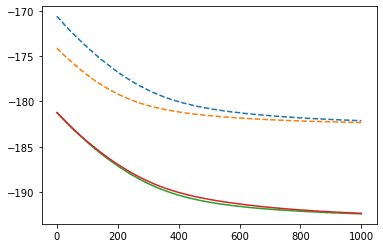

In [37]:
plt.figure()
plt.plot(d_kmeans[0]['loss'], linestyle = '--')
plt.plot(d_kmeans[1]['loss'], linestyle = '--')
plt.plot(d_exact[0]['loss'], linestyle = '-')
plt.plot(d_exact[1]['loss'], linestyle = '-')
plt.show()

In [38]:
torch.cos(torch.tensor(0.5))

tensor(0.8776)

In [39]:
bcm_exact.prediction(testpoint, var = True)

(tensor([[0.8764]]), tensor([[0.0547]]))

In [42]:
bcm_kmeans.prediction(testpoint, True, 1, 'PoE')

(tensor([0.8763]), tensor([0.0308]))

In [43]:
bcm_kmeans.prediction(testpoint, True, 1, 'BCM')

(tensor([0.8763]), tensor([0.0308]))

### 2D Example

In [14]:
ndata = 150
inputs = torch.rand(ndata, 2)
yvals = inputs[:,0] * torch.cos(inputs[:,1])
hyper = torch.Tensor([0.0, 0.0, 0.0])
testpoint = torch.Tensor([[0.5, 0.5]])

In [15]:
bcm_kmeans = BayesianMachine(inputs, yvals, 1E-4, n_clusters = 2)
bcm_exact = BayesianMachine(inputs, yvals, 1E-4)

In [26]:
config_exact = {'niter': 2000, 'lrate': 1E-3, 'nrestart': 2}
config_kmean = {'niter': 2000, 'lrate': 1E-3, 'nrestart': 2}

In [27]:
d_kmeans = bcm_kmeans.optimisation(hyper, config_kmean)
d_exact = bcm_exact.optimisation(hyper, config_exact)

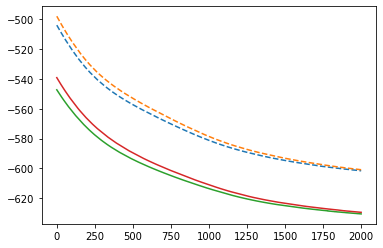

In [28]:
plt.figure()
plt.plot(d_kmeans[0]['loss'], linestyle = '--')
plt.plot(d_kmeans[1]['loss'], linestyle = '--')
plt.plot(d_exact[0]['loss'], linestyle = '-')
plt.plot(d_exact[1]['loss'], linestyle = '-')
plt.show()

In [29]:
testpoint[0, 0] * torch.cos(testpoint[0, 1])

tensor(0.4388)

In [30]:
bcm_exact.prediction(testpoint, var = True)

(tensor([[0.4390]]), tensor([[0.1411]]))

In [31]:
bcm_kmeans.prediction(testpoint, True, 1, 'PoE')

(tensor([0.4384]), tensor([0.1500]))

In [32]:
bcm_kmeans.prediction(testpoint, True, 1, 'BCM')

(tensor([0.4384]), tensor([0.1500]))